This code implements the algorithm defined in the Allbirds paper

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [7]:
images_path = "D:\images0"
labels_path = "D:\labels0"
image_files = os.listdir(images_path)
label_files = os.listdir(labels_path)

sequence = image_files[14:24]

print("Files for initial processing:\n", sequence)



Files for initial processing:
 ['0001070.png', '0001071.png', '0001075.png', '0001078.png', '0001080.png', '0001081.png', '0001082.png', '0001084.png', '0001087.png', '0001088.png']


In [27]:
I0_filename = sequence[0][:-4]
image_path = os.path.join(images_path, str(I0_filename + '.png'))
I0 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
I0_blurred = cv2.GaussianBlur(I0, (3,3), 0)

min_thresh = 30 
max_thresh = 255
bounding_boxes = []

for file in sequence[1:]:
    print('new img')
    filename = file[:-4]
    image_path = os.path.join(images_path, str(filename + '.png'))

    IN = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    IN_blurred =  cv2.GaussianBlur(IN, (3,3), 0)

    IN_diff = cv2.absdiff(I0_blurred, IN_blurred)

    _, d_thresh = cv2.threshold(IN_diff, min_thresh, max_thresh, cv2.THRESH_BINARY)
    
    d_dilated = cv2.dilate(d_thresh, None, iterations=2)

    contours, _ = cv2.findContours(d_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    b_i = []

    for contour in contours:
        if cv2.contourArea(contour) < 100:  # Birds are typically small
            x, y, w, h = cv2.boundingRect(contour)
            b_i.append((x, y, w, h))

    bounding_boxes.append(b_i)
    print(b_i)
    I0_blurred = IN_blurred


new img
[(1116, 738, 6, 8), (1879, 650, 9, 8), (1869, 650, 9, 8), (1742, 637, 7, 7)]
new img
[(1130, 743, 8, 9), (44, 743, 9, 9), (40, 737, 6, 6), (1179, 736, 6, 6), (1234, 733, 5, 6), (1205, 732, 6, 6), (1241, 731, 7, 9), (566, 727, 6, 7), (1869, 650, 9, 8), (1816, 647, 8, 7), (1674, 633, 7, 7)]
new img
[(1911, 1066, 9, 14), (42, 744, 5, 5), (1120, 740, 5, 5), (1176, 736, 8, 6), (35, 731, 5, 6), (1816, 647, 8, 7), (1785, 645, 9, 8), (1674, 633, 7, 7), (1642, 630, 8, 8)]
new img
[(15, 748, 6, 5), (43, 746, 6, 6), (1785, 645, 9, 8), (1755, 643, 9, 10), (1642, 630, 8, 8), (1611, 625, 7, 7)]
new img
[(1755, 643, 9, 10), (1611, 625, 7, 7)]
new img
[(1737, 642, 8, 8)]
new img
[(1898, 1067, 12, 8), (1007, 797, 14, 5), (1007, 789, 18, 6), (72, 752, 6, 6), (40, 742, 7, 7), (1241, 734, 5, 5), (1177, 734, 8, 9), (1478, 730, 10, 8), (1906, 712, 5, 5), (1737, 642, 8, 8), (1713, 641, 8, 8), (1561, 621, 8, 7)]
new img
[(1635, 1075, 14, 5), (1624, 1067, 9, 5), (1679, 1064, 20, 6), (1006, 797, 16, 5),

[(1116, 738, 6, 8), (1879, 650, 9, 8), (1869, 650, 9, 8), (1742, 637, 7, 7)]


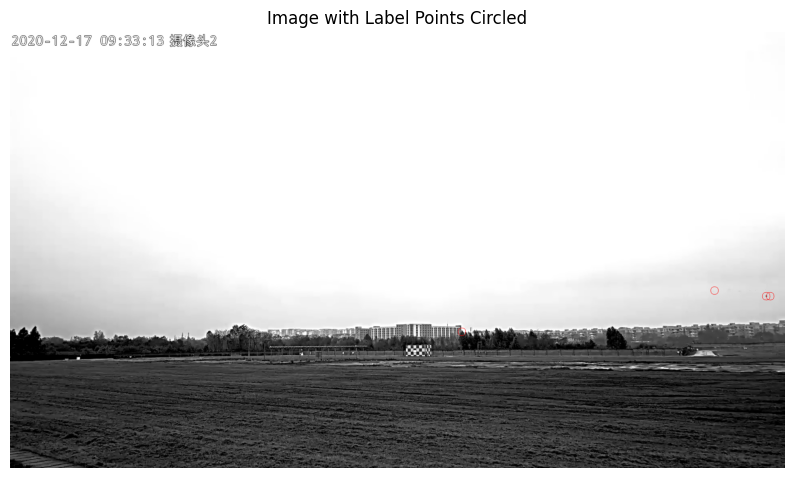

In [32]:
circle_radius = 10
circle_color = (0, 0, 255)  # Red in BGR format
circle_thickness = 1

for i, file in enumerate(sequence[1:2]):
    filename = file[:-4]
    image_path = os.path.join(images_path, str(filename + '.png'))
    
    # Load the current image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Convert grayscale to BGR to allow color drawing
    image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Get bounding boxes for the current frame
    b_i = bounding_boxes[i] if i < len(bounding_boxes) else []
    print(b_i)
    
    # Draw a red circle at the center of each bounding box
    for (x, y, w, h) in b_i:
        # Calculate center of the bounding box
        center_x = x + w // 2
        center_y = y + h // 2
        # Draw the circle on the image
        circled_img = cv2.circle(image_bgr, (center_x, center_y), circle_radius, circle_color, circle_thickness)
    
plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(circled_img, cv2.COLOR_BGR2RGB))  # Convert to RGB for display in Matplotlib
plt.title('Image with Label Points Circled')
plt.axis('off')
plt.show()
